In [ ]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
from bellem.dvc.experiment import load_experiments

experiments = load_experiments('musique.json')
print(f"{len(experiments)} experiments")
experiments[0]

21 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'train': {'dataset': {'path': 'bdsaglam/musique-mini',
    'name': 'answerable',
    'split': 'train'},
   'optimizer': 'noop'},
  'qa': {'model': 'llama-3-70b-tgi',
   'temperature': 0.1,
   'technique': 'standard'},
  'evaluation': {'dataset': {'path': 'bdsaglam/musique-mini',
    'name': 'answerable',
    'split': 'validation'}},
  'run': 1},
 'metrics': {'exact_match': 0.55,
  'f1': 0.6629834609834611,
  'fuzzy_match': 0.61,
  '2hops': {'exact_match': 0.6, 'f1': 0.7348075258075258, 'fuzzy_match': 0.68},
  '3hops': {'exact_match': 0.59,
   'f1': 0.6825476190476191,
   'fuzzy_match': 0.64},
  '4hops': {'exact_match': 0.46,
   'f1': 0.5715952380952382,
   'fuzzy_match': 0.51}}}

In [3]:
df = pd.json_normalize(experiments).drop(columns=["commit", "id"])

param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
# df.drop_duplicates(subset=param_cols, inplace=True)

df = df[~df['name'].isin([None])].copy()
df = df[df['params.evaluation.dataset.path']=='bdsaglam/musique'].copy()
df.reset_index(drop=True, inplace=True)
df

,name,params.train.dataset.path,params.train.dataset.name,params.train.dataset.split,params.train.optimizer,params.qa.model,params.qa.temperature,params.qa.technique,params.evaluation.dataset.path,params.evaluation.dataset.name,...,metrics.fuzzy_match,metrics.2hops.exact_match,metrics.2hops.f1,metrics.2hops.fuzzy_match,metrics.3hops.exact_match,metrics.3hops.f1,metrics.3hops.fuzzy_match,metrics.4hops.exact_match,metrics.4hops.f1,metrics.4hops.fuzzy_match
0,minor-knit,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.658668,0.634984,0.743337,0.700479,0.588158,0.718092,0.646053,0.508642,0.592465,0.553086
1,peppy-pans,bdsaglam/musique-mini,answerable,train,miprov2-light,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.652875,0.629393,0.740232,0.694089,0.584211,0.713838,0.642105,0.498765,0.585916,0.545679
2,hated-alga,bdsaglam/musique-mini,answerable,train,noop,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.653289,0.630990,0.739310,0.696486,0.581579,0.710720,0.642105,0.508642,0.595381,0.540741
3,burry-daws,bdsaglam/musique-mini,answerable,train,bfs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.683492,0.646166,0.766203,0.715655,0.617105,0.743502,0.693421,0.525926,0.616820,0.565432
4,chirk-zoea,bdsaglam/musique-mini,answerable,train,noop,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.654944,0.631789,0.741108,0.699681,0.580263,0.706429,0.640789,0.508642,0.595082,0.543210
5,axile-yogi,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cot,bdsaglam/musique,answerable,...,0.688871,0.638179,0.764870,0.714856,0.614474,0.742040,0.696053,0.555556,0.641240,0.595062
6,bifid-many,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.654530,0.630990,0.741251,0.697284,0.588158,0.710102,0.647368,0.491358,0.585728,0.535802
7,tidal-kyat,bdsaglam/musique-mini,answerable,train,bfsrs-medium,llama-3-70b-tgi,0.1,standard,bdsaglam/musique,answerable,...,0.695490,0.658147,0.772644,0.733227,0.643421,0.749181,0.700000,0.533333,0.634908,0.570370
8,malar-shoe,bdsaglam/musique-mini,answerable,train,miprov2-light,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.654530,0.630990,0.741251,0.697284,0.588158,0.710102,0.647368,0.491358,0.585728,0.535802
9,weird-mela,bdsaglam/musique-mini,answerable,train,bfs-medium,llama-3-70b-tgi,0.1,cte,bdsaglam/musique,answerable,...,0.684319,0.647764,0.767573,0.718051,0.619737,0.745722,0.693421,0.523457,0.616502,0.562963


In [4]:
target_params = ["params.qa.technique", "params.train.optimizer", "params.qa.temperature"]

In [5]:
run_counts = df.groupby(target_params)[metric_cols[:1]].count().reset_index()
mask = run_counts[metric_cols[0]] < 3
run_counts.loc[mask]

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match
0,cot,bfs-medium,0.1,1
1,cot,bfsrs-medium,0.1,1
2,cot,miprov2-light,0.1,1
3,cot,noop,0.1,1
4,cte,bfs-medium,0.1,2
5,cte,bfsrs-medium,0.1,2
6,cte,miprov2-light,0.1,2
7,cte,noop,0.1,2
8,standard,bfs-medium,0.1,1
9,standard,bfsrs-medium,0.1,1


In [31]:
target_params

['params.qa.technique', 'params.train.optimizer', 'params.qa.temperature']

In [63]:
# Average metrics over repeated runs (params.run)
df_target = df.groupby(target_params)[metric_cols].max().reset_index()
df_target[[*target_params, *metric_cols[:2]]].sort_values("metrics.f1", ascending=False)

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1
9,standard,bfsrs-medium,0.1,0.632602,0.742187
1,cot,bfsrs-medium,0.1,0.616880,0.736976
4,cte,bfs-medium,0.1,0.618122,0.735388
0,cot,bfs-medium,0.1,0.611916,0.734010
10,standard,miprov2-light,0.1,0.612743,0.733104
2,cot,miprov2-light,0.1,0.608192,0.733053
8,standard,bfs-medium,0.1,0.612743,0.732437
5,cte,bfsrs-medium,0.1,0.599090,0.710118
3,cot,noop,0.1,0.600331,0.706207
7,cte,noop,0.1,0.594952,0.706203


In [69]:
mask = df_target['params.qa.technique'] != 'cte'
df_target.loc[mask, [*target_params, *metric_cols[:2]]].sort_values("metrics.f1", ascending=False)

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1
9,standard,bfsrs-medium,0.1,0.632602,0.742187
1,cot,bfsrs-medium,0.1,0.616880,0.736976
0,cot,bfs-medium,0.1,0.611916,0.734010
10,standard,miprov2-light,0.1,0.612743,0.733104
2,cot,miprov2-light,0.1,0.608192,0.733053
8,standard,bfs-medium,0.1,0.612743,0.732437
3,cot,noop,0.1,0.600331,0.706207
11,standard,noop,0.1,0.560612,0.682180


In [93]:
_df = df_target[target_params + metric_cols[:2]].copy()
_df = _df.set_index(["params.qa.technique", "params.train.optimizer"])

# Define the desired order for the second index
technique_order = ["standard", "cot", "cte"]
optimizer_order = ["noop", "bfs-medium", "bfsrs-medium", "miprov2-light"]

# Reindex the DataFrame to apply the desired order to the second index
_df = _df.reindex(
    index=pd.MultiIndex.from_product(
        [technique_order, optimizer_order],
        names=_df.index.names,
    )
)

# Set precision for metric columns
_df[metric_cols[:2]] = _df[metric_cols[:2]].map(lambda x: round(x, 3))

# Display the styled DataFrame
display(_df)


params.qa.temperature  \
params.qa.technique params.train.optimizer                          
standard            noop                                      0.1   
                    bfs-medium                                0.1   
                    bfsrs-medium                              0.1   
                    miprov2-light                             0.1   
cot                 noop                                      0.1   
                    bfs-medium                                0.1   
                    bfsrs-medium                              0.1   
                    miprov2-light                             0.1   
cte                 noop                                      0.1   
                    bfs-medium                                0.1   
                    bfsrs-medium                              0.1   
                    miprov2-light                             0.1   

                                            metrics.exact_match  metrics.f1  
params.qa.technique params.train.optimizer                                   
standard            noop                                  0.561       0.682  
                    bfs-medium                            0.613       0.732  
                    bfsrs-medium                          0.633       0.742  
                    miprov2-light                         0.613       0.733  
cot                 noop                                  0.600       0.706  
                    bfs-medium                            0.612       0.734  
                    bfsrs-medium                          0.617       0.737  
                    miprov2-light                         0.608       0.733  
cte                 noop                                  0.595       0.706  
                    bfs-medium                            0.618       0.735  
                    bfsrs-medium                          0.599       0.710  
                    miprov2-light                         0.594       0.706

In [94]:
# Group by technique and find the best optimizer for each technique
best_per_technique = df_target.loc[df_target.groupby("params.qa.technique")["metrics.f1"].idxmax(), target_params + metric_cols[:2]]

# Sort techniques by best F1 score
best_per_technique = best_per_technique.sort_values(by="metrics.f1", ascending=False)

# Highlight the maximum F1 score in bold using Styler
styled_df = best_per_technique.style.highlight_max(subset=["metrics.f1"], props="font-weight: bold;").format(precision=3)

# Display the best optimizers per technique as a styled DataFrame
display(styled_df)

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1
9,standard,bfsrs-medium,0.100,0.633,0.742
1,cot,bfsrs-medium,0.100,0.617,0.737
4,cte,bfs-medium,0.100,0.618,0.735


In [ ]:
[
    {
        "technique": record["params.qa.technique"],
        "optimizer": "auto/" + record["params.train.optimizer"],
        "exact_match": record["metrics.exact_match"],
        "f1": record["metrics.f1"],
    }
    for record in best_per_technique.to_dict(orient="records")
]

[{'technique': 'standard',
  'optimizer': 'auto/bfsrs-medium',
  'exact_match': 0.6326023996690112,
  'f1': 0.7421867020999712},
 {'technique': 'cot',
  'optimizer': 'auto/bfsrs-medium',
  'exact_match': 0.6168804302854779,
  'f1': 0.7369758498771094},
 {'technique': 'cte',
  'optimizer': 'auto/bfs-medium',
  'exact_match': 0.6181216383947041,
  'f1': 0.7353884126505528}]

,params.qa.technique,params.train.optimizer,params.qa.temperature,metrics.exact_match,metrics.f1
9,standard,bfsrs-medium,0.100,0.633,0.742
1,cot,bfsrs-medium,0.100,0.617,0.737
4,cte,bfs-medium,0.100,0.618,0.735


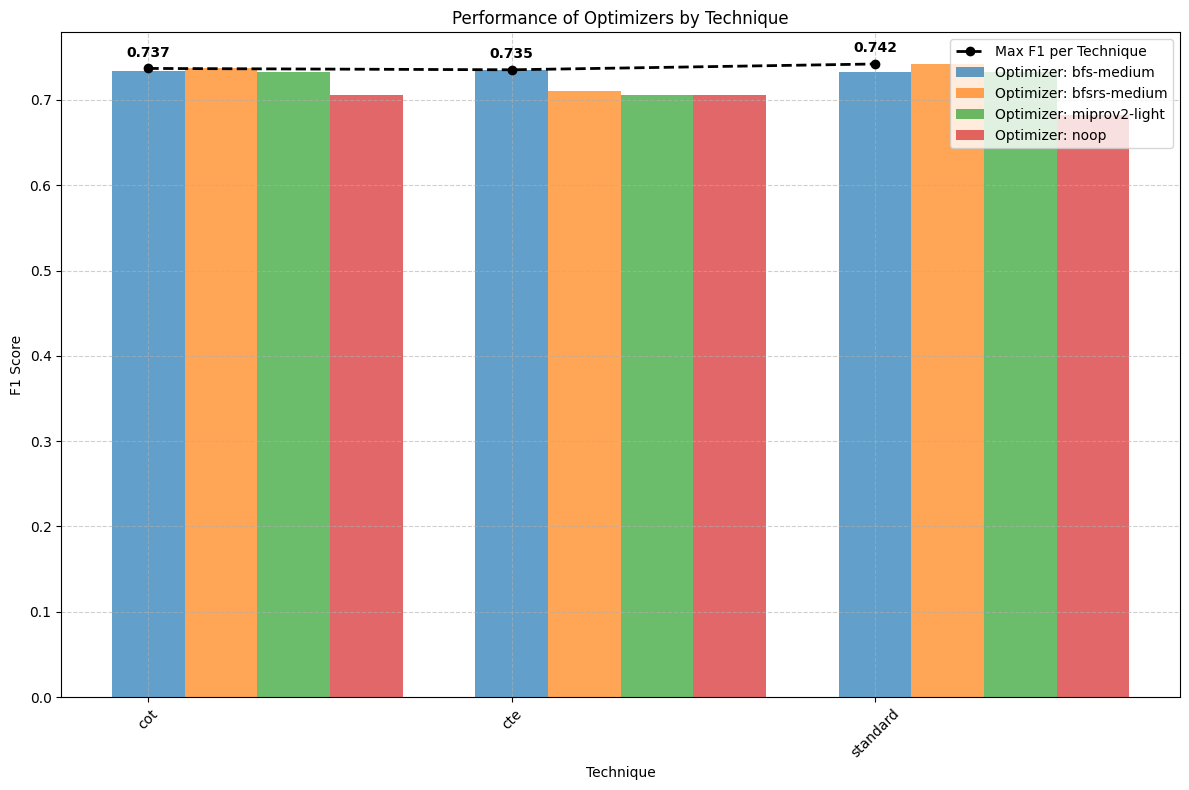

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from IPython.display import display

# Group by technique and find the best optimizer for each technique
best_per_technique = df_target.loc[df_target.groupby("params.qa.technique")["metrics.f1"].idxmax(), target_params + metric_cols[:2]]

# Sort techniques by best F1 score
best_per_technique = best_per_technique.sort_values(by="metrics.f1", ascending=False)

# Highlight the maximum F1 score in bold using Styler and format to 3 decimal places
styled_df = best_per_technique.style.highlight_max(subset=["metrics.f1"], props="font-weight: bold;").format(precision=3)

# Display the best optimizers per technique as a styled DataFrame
display(styled_df)

# Bar and Line Plot for Techniques and Optimizers
techniques = df_target["params.qa.technique"].unique()
optimizers = df_target["params.train.optimizer"].unique()

fig, ax = plt.subplots(figsize=(12, 8))
width = 0.2  # Bar width
x = np.arange(len(techniques))  # X positions for techniques

# Prepare data for plotting
bar_offsets = {optimizer: idx - len(optimizers) // 2 for idx, optimizer in enumerate(range(len(optimizers)))}

# Plot bars for each optimizer
for idx, optimizer in enumerate(optimizers):
    optimizer_f1 = [
        df_target[(df_target["params.qa.technique"] == technique) & (df_target["params.train.optimizer"] == optimizer)]["metrics.f1"].max()
        for technique in techniques
    ]
    ax.bar(x + width * idx, optimizer_f1, width, label=f"Optimizer: {optimizer}", alpha=0.7)

# Plot line for maximum F1 per technique
max_f1_per_technique = [df_target[df_target["params.qa.technique"] == technique]["metrics.f1"].max() for technique in techniques]
ax.plot(x, max_f1_per_technique, label="Max F1 per Technique", color="black", linestyle="--", marker="o", linewidth=2)

# Annotate the maximum F1 line
for i, f1_value in enumerate(max_f1_per_technique):
    ax.text(x[i], f1_value + 0.01, f"{f1_value:.3f}", ha="center", va="bottom", fontsize=10, fontweight="bold")

# Add legend and titles
ax.set_title("Performance of Optimizers by Technique")
ax.set_xlabel("Technique")
ax.set_ylabel("F1 Score")
ax.set_xticks(x)
ax.set_xticklabels(techniques, rotation=45)
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

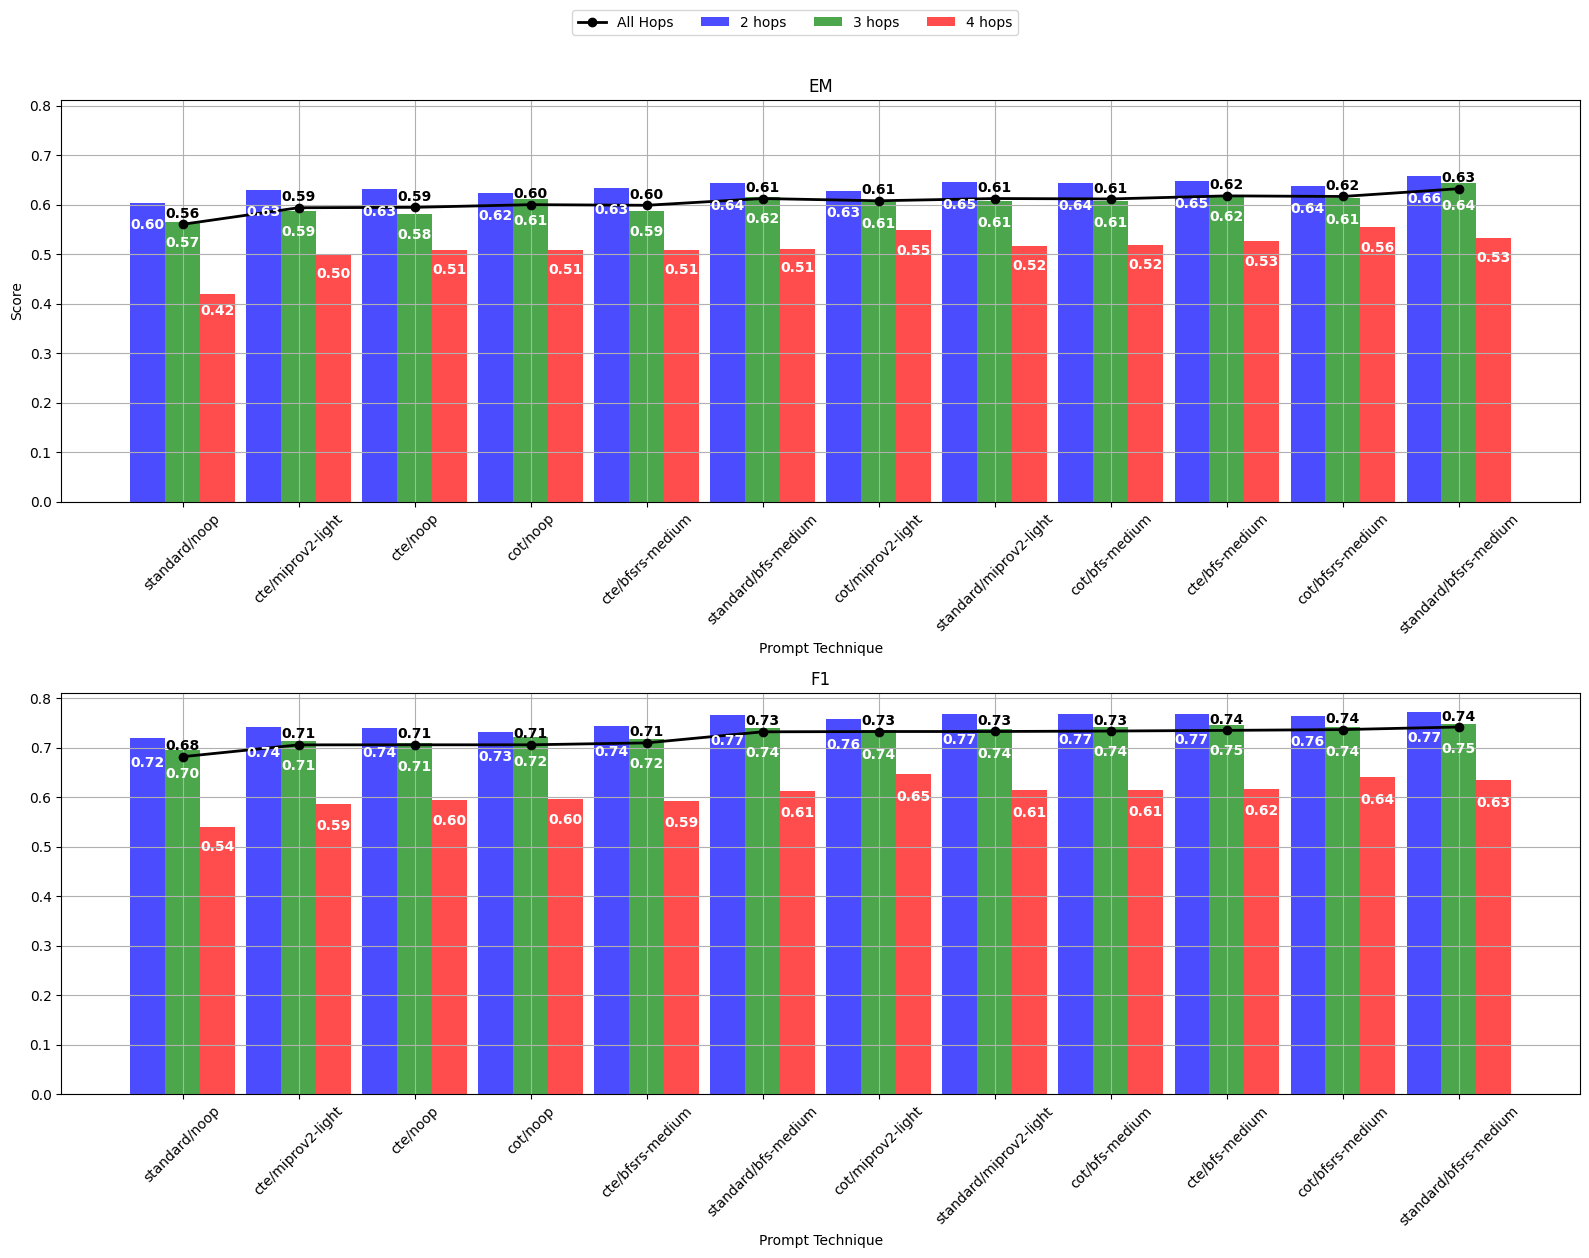

In [8]:
def plot_metric(ax, x, width, prompts, metrics, title, ylabel=None):
    bars_2hops = ax.bar(x - width, metrics["2hops"], width, label="2 hops", color="b", alpha=0.7)
    bars_3hops = ax.bar(x, metrics["3hops"], width, label="3 hops", color="g", alpha=0.7)
    bars_4hops = ax.bar(x + width, metrics["4hops"], width, label="4 hops", color="r", alpha=0.7)

    # Plotting all hops as a line plot
    ax.plot(x, metrics["all"], label="All Hops", color="k", linestyle="-", marker="o", linewidth=2)

    # Adding values inside the bars, just below the top
    for bars in [bars_2hops, bars_3hops, bars_4hops]:
        for bar in bars:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() - (bar.get_height() * 0.05),
                f"{bar.get_height():.2f}",
                ha="center",
                va="top",
                fontsize=10,
                color="white",
                fontweight="bold",
            )

    # Adding values on top of the line plot
    for i, value in enumerate(metrics["all"]):
        ax.text(
            x[i],
            value + 0.007,
            f"{value:.2f}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold",
        )

    # Adjust titles and labels
    ax.set_title(title)
    ax.set_xlabel("Prompt Technique")
    ax.set_xticks(x)
    ax.set_xticklabels([prompt.replace(".txt", "") for prompt in prompts], rotation=45)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.grid(True)


# Creating subplots for Exact Match and F1, separating them for clarity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12), sharey=True)

width = 0.3  # Bar width adjustment

prompts = [
    f"{pt}/{optim}"
    for pt, optim in zip(df_target["params.qa.technique"].values, df_target["params.train.optimizer"].values)
]
x = np.arange(len(prompts))


# Plotting Exact Match
metrics_em = {
    "2hops": df_target["metrics.2hops.exact_match"].values,
    "3hops": df_target["metrics.3hops.exact_match"].values,
    "4hops": df_target["metrics.4hops.exact_match"].values,
    "all": df_target["metrics.exact_match"].values,
}
plot_metric(ax1, x, width, prompts, metrics_em, title="EM", ylabel="Score")

# Plotting F1
metrics_f1 = {
    "2hops": df_target["metrics.2hops.f1"].values,
    "3hops": df_target["metrics.3hops.f1"].values,
    "4hops": df_target["metrics.4hops.f1"].values,
    "all": df_target["metrics.f1"].values,
}
plot_metric(ax2, x, width, prompts, metrics_f1, title="F1")

# Creating a shared legend outside the plots
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, 1.05), ncol=4)

plt.tight_layout()
plt.show()